In [2]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing (i.e. pd.read_csv)
import seaborn as sns # visualizations
import matplotlib.pyplot as plt # visualizations

%matplotlib inline

In [3]:
# Import data

df = pd.read_excel("datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

In [4]:
# Snapshot of data; 5 entries & columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


    From this snapshot, we observe that "customerID" won't help us in creating a churn model, so we delete the
    column.

In [5]:
# Drop "customerID"
df.drop(labels=['customerID'], axis=1, inplace=True)

In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
# Missing Values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Fill "TotalCharges" empty entries with mean of values

total_charges_mean = df['TotalCharges'].mean() # Mean
df['TotalCharges'].fillna(total_charges_mean, inplace=True) # Fillna with Mean

In [9]:
# Keep original dataset
data = df.copy()

#### Exploratory Data Analysis

    In this analysis, we will explore and seek to identify features where customers churn.
    Therefore, we will employ a mix of the following type of analysis:
        * Univariate Analysis
        * Multivariate Analysis

    # Graphs

In [47]:
def distribution(variable, title, xlabel, fig_name):
    """
        variable: reference to the variable with which to visualize a distribution.
        title: a string representing of the title of the distribution.
        xlabel: a string representing the xlabel of the distribution.
    """
    
    
    fig, ax = plt.subplots(figsize=(12,5))

    sns_plot = sns.distplot(variable, bins=25, kde=False, color="#8DA0CB")
    ax.set_title(title, fontdict={'fontsize': 16, 'fontweight': 'light'})
    ax.set_ylabel("Frequency")
    ax.set_xlabel(xlabel)

    sns.despine(left=True)
    sns.set_style('white')
    ax.yaxis.grid()
    
    sns_plot.get_figure().savefig(fig_name)

In [52]:
def paired_distribution(variable_one, variable_two, title_one, title_two, xlabel_one, xlabel_two, fig_name, sharey=False):
    """
        variable_one: reference to the variable with which to visualize a distribution.
        variable_two: reference to the second variable with which to compare the distribition.
        title_one: a string representing of the title to the first distribution.
        title_two: a string representing of the title to the second distribution.
        xlabel_one: a string representing of the xlabel of the first distribution.
        xlabel_two: a string representing of the xlabel of the second distribution.
    """
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12), sharey=sharey)

    ax1 = ax[0]
    ax2 = ax[1]

    # First Graph
    sns.distplot(variable_one, bins=25, kde=False, ax=ax1, color="#66C2A5")
    ax1.set_title(title_one, fontdict={'fontsize': 16, 'fontweight': 'light'})
    ax1.set_ylabel("Number of customers")
    ax1.set_xlabel(xlabel_one)
    ax1.yaxis.grid()

    # Second Graph
    sns.distplot(variable_two, bins=25, kde=False, ax=ax2, color="#F28C61")
    ax2.set_title(title_two, fontdict={'fontsize': 16, 'fontweight': 'light'})
    ax2.set_ylabel("Number of customers")
    ax2.set_xlabel(xlabel_two)
    ax2.yaxis.grid()

    sns.despine(left=True)
    sns.set_style('white')
    
    plt.savefig(fig_name)

    # Churn
    
      Objective:
          * Understand the distribution of values
      
      Observation:
          * Our data is somehow biased or tilted towards one response; about 70% of customers did not
            churn, and most 30% churned.

In [12]:
# Convert dtype from "object" to "Category"
df['Churn'] = df['Churn'].astype("category")

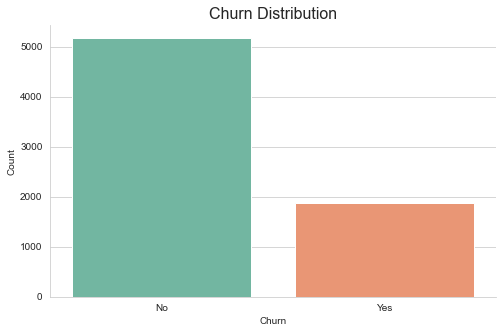

In [41]:
fig, ax = plt.subplots(figsize=(8,5))

sns_plot = sns.countplot(x="Churn", data=df, palette="Set2")
ax.set_title("Churn Distribution", fontdict={'fontsize': 16, 'fontweight': 'light'})
ax.set_ylabel("Count")
ax.set_xlabel("Churn")

sns.despine(top=True)
sns.set_style('whitegrid')

sns_plot.get_figure().savefig("churn_dist.png")

    # Gender
    
      Objective:
          * Understand gender representation.
          * Gender representation by churn.
          
      Observation:
          * Gender's male and female are equally represented in the data.
          * Similarly, gender representation by "Churn" almost equal.
          
      Infer:
          * Gender wouldn't have a significant contribution to "Churn".

In [14]:
# Convert dtype from "object" to "Category"
df['gender'] = df['gender'].astype("category")

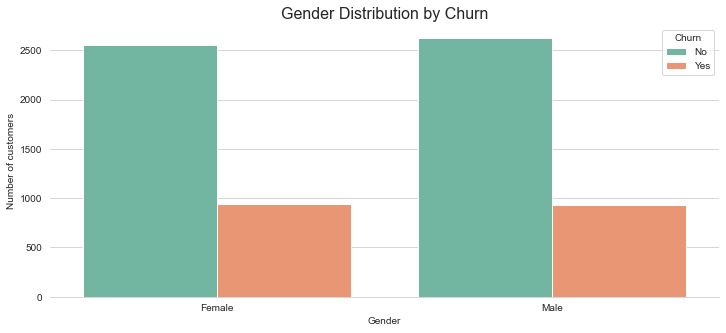

In [43]:
fig, ax = plt.subplots(figsize=(12,5))

sns_plot = sns.countplot(x="gender", data=df, palette="Set2", hue="Churn")
ax.set_title("Gender Distribution by Churn", fontdict={'fontsize': 16, 'fontweight': 'light'})
ax.set_ylabel("Number of customers")
ax.set_xlabel("Gender")

sns.despine(top=True, left=True)
sns.set_style('whitegrid')

sns_plot.get_figure().savefig("gender_dist.png")

    # Tenure
    
        Objective:
            * How long did the most loyal customer stay?
            * How long did the least loyal customer stay?
            * How does tenure distribution vary with Churn?
            
        Observations:
            * The Maximum tenure is 72; 72 months
            * Minimum tenure is 0; 0 months
            * The majority of customers who churned stayed for around 0 months and 20 months.
            * Those did not churn were distributed around 0 and 72 months, but we observe that
              a majority of them clustered around 0 and 20 months, and 50 and 72 months.
              
         Infer:
             * This could be a good feature to describing churn.

In [16]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

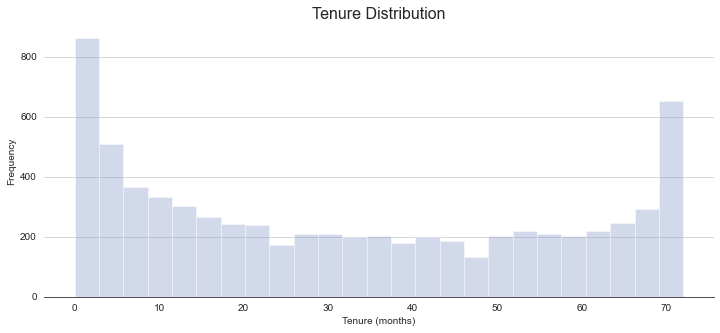

In [48]:
distribution(df['tenure'], title="Tenure Distribution", xlabel="Tenure (months)", fig_name="tenure_dist.png")

In [18]:
# Mask Churn by "No"
churn_mask = df['Churn'] == "No"

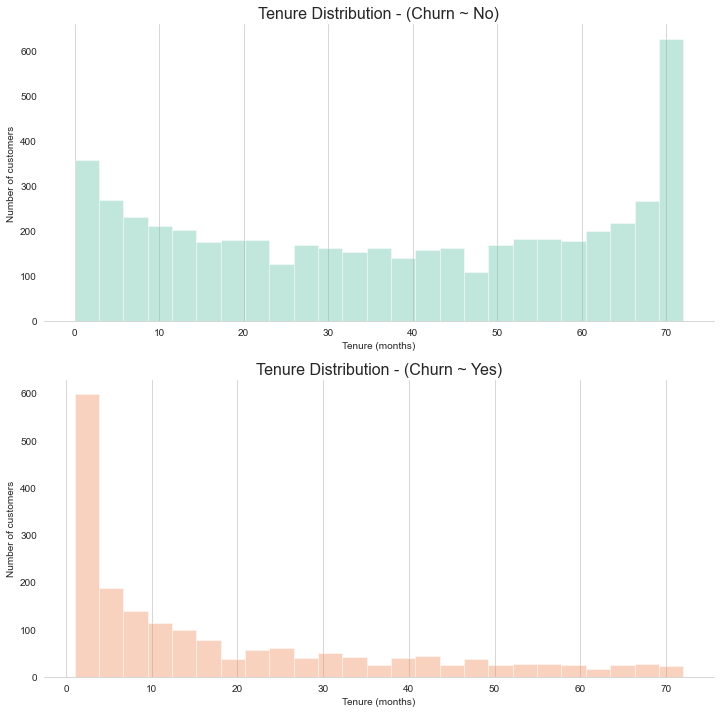

In [53]:
paired_distribution(
    df[churn_mask]['tenure'], 
    df[~churn_mask]['tenure'], 
    title_one="Tenure Distribution - (Churn ~ No)", 
    title_two="Tenure Distribution - (Churn ~ Yes)", 
    xlabel_one="Tenure (months)", 
    xlabel_two="Tenure (months)", 
    fig_name="tenure_churn_dist.png",
    sharey=False) 

    # Monthly Charges
    
        Objectives:
            * What was the mean monthly charge?
            * What was the maximum and minimum monthly charges?
            * How does monthly charges vary with churn?
            
        Observations:
            * The mean monthly charges was USD 64.
            * The maximum and minimum monthly charges were USD 118 and USD 18, respectivly.
            * On average, those who churned had monthly charges less than those we didn't churn.
            
        Infer:
            * Monthly Charges could be a good feature to predicting churn.

In [20]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

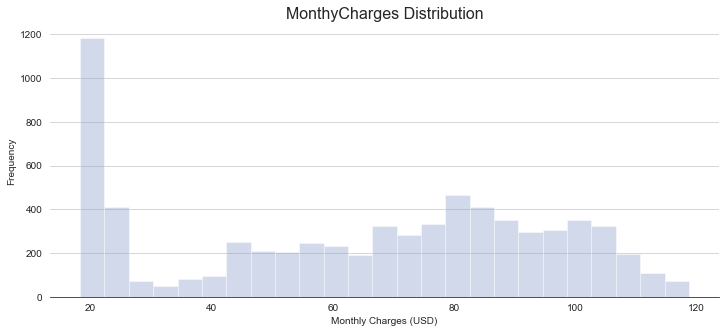

In [49]:
distribution(
    df['MonthlyCharges'], 
    title="MonthyCharges Distribution", 
    xlabel="Monthly Charges (USD)", 
    fig_name="monthly_charges.png"
)

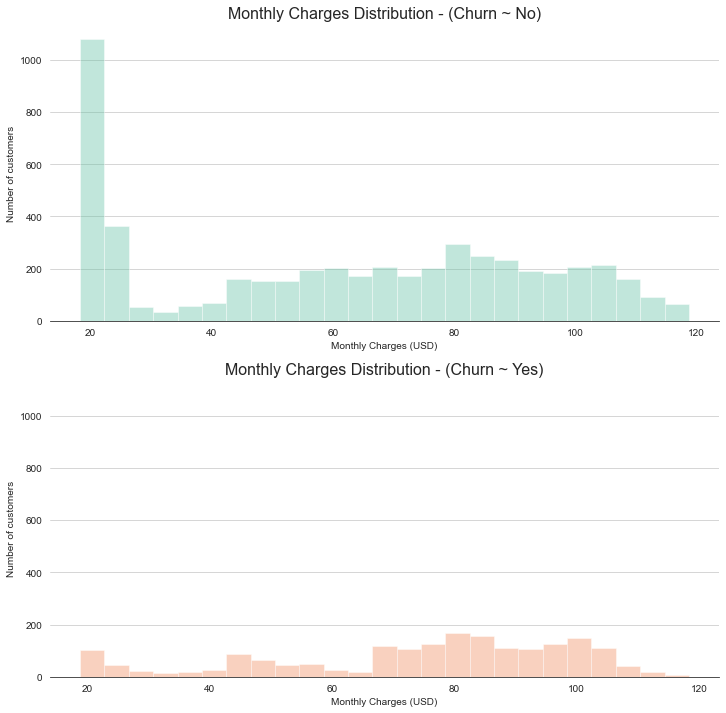

In [54]:
paired_distribution(
    df[churn_mask]['MonthlyCharges'], 
    df[~churn_mask]['MonthlyCharges'], 
    title_one="Monthly Charges Distribution - (Churn ~ No)", 
    title_two="Monthly Charges Distribution - (Churn ~ Yes)", 
    xlabel_one="Monthly Charges (USD)", 
    xlabel_two="Monthly Charges (USD)", 
    fig_name="month_charges_churn.png", 
    sharey=True)

    # Total Charges
    
        Objectives:
            * What was the mean monthly charge?
            * What was the maximum and minimum monthly charges?
            * How does monthly charges vary with churn?
            
        Observations:
            * The mean total charges was USD 2283.
            * The maximum and minimum total charges were USD 8684 and USD 18, respectively.
            * Total Charges has a distribution that is right skewed; as the total charges increases,
              we observe the frequency of customer dropping down, and vice-versa.
            * On average, customer who churned had a distribution was total charges that was less than
              that of customer didn't churn.
              
        Infer:
            * Total Charges can be a significant feature to predicting churn.

In [24]:
df['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

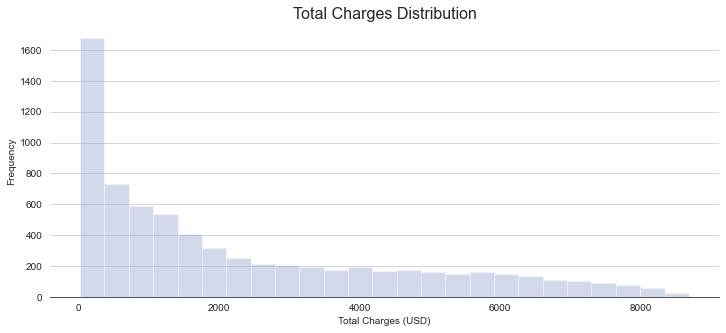

In [50]:
distribution(
    df['TotalCharges'], 
    title="Total Charges Distribution", 
    xlabel="Total Charges (USD)", 
    fig_name="total_charges.png"
)

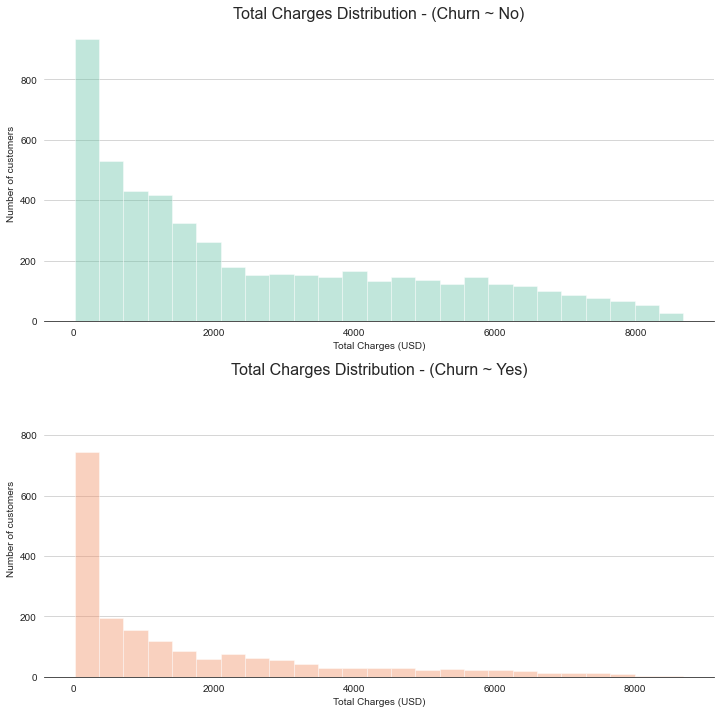

In [55]:
paired_distribution(
    df[churn_mask]['TotalCharges'], 
    df[~churn_mask]['TotalCharges'], 
    title_one="Total Charges Distribution - (Churn ~ No)", 
    title_two="Total Charges Distribution - (Churn ~ Yes)", 
    xlabel_one="Total Charges (USD)", 
    xlabel_two="Total Charges (USD)", 
    fig_name="total_charges_churn.png", 
    sharey=True)

    # Contract
    
        Objective:
            * Understand Contract distribution by Churn
            
        Observation:
            * Most customers are on a "Month-to-Month" contract.
            * Nearly 2/3 of customers on this contract churn.
            * A very small number of customer on a "One-year" and "Two-year" contract churned.

In [32]:
# Convert dtype from "object" to "category"
df['Contract'] = df['Contract'].astype('category')

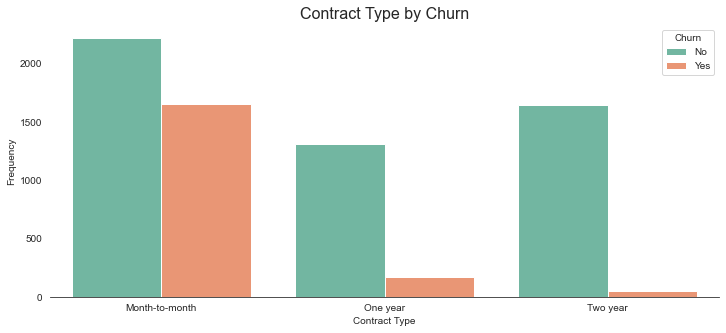

In [51]:
fig, ax = plt.subplots(figsize=(12,5)) # fig & axes objects to control visualizations

sns_plot = sns.countplot(x="Contract", data=df, hue='Churn', palette="Set2")
ax.set_title("Contract Type by Churn", fontdict={'fontsize': 16, 'fontweight': 'light'})
ax.set_ylabel("Frequency")
ax.set_xlabel("Contract Type")

sns.despine(top=True, left=True)
sns.set_style('whitegrid')

sns_plot.get_figure().savefig("contract_type.png")

#### Feature Extraction

    Observing that most of our features contain non-numerical values, we will encode them; meaning that they will
    be converted from non-numerical to numerical.

In [9]:
# Import LabelEncoder for Encoding
from sklearn.preprocessing import LabelEncoder

# LabelEncoder Function
def label_encoder(data_frame, labels):
    """
        | data_frame: DataFrame contains labels to encode
        | labels: Labels found within the argument DataFrame
    """

    # Initialize LabelEncoder method
    le = LabelEncoder()
    
    for label in labels:
        le.fit(data_frame[label]) # Fit data to LabelEncode
        output = le.transform(data_frame[label]) # Transform the fitted data
        data_frame[label] = pd.Series(data=output) # Re-assign the transfored data to the DataFrame

In [10]:
# List of label names to Encode
encode_label = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', \
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Calling label_encoder
label_encoder(data, encode_label)

In [11]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


    Feature Extraction ~ Correlation

In [12]:
corr = data.corr() # Pairwise correlation between features

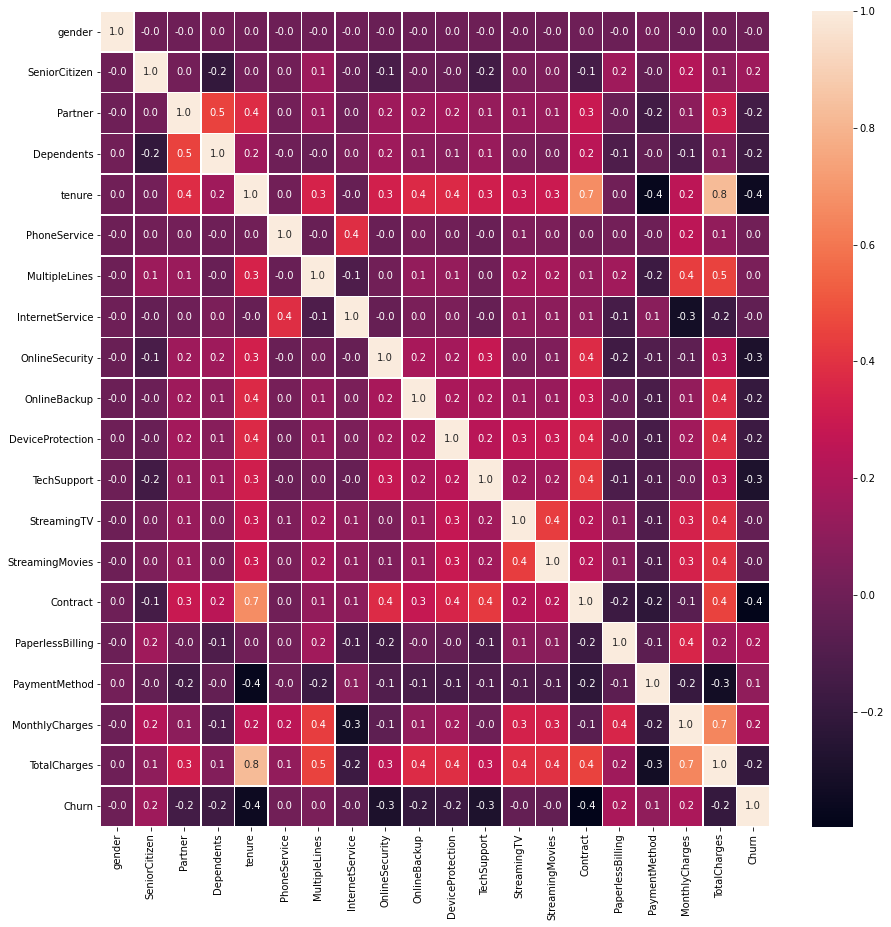

In [13]:
fig, ax = plt.subplots(figsize=(15,15)) # fig & axes objects to control visualizations

sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f', ax=ax) # HeatMap to visualize pairwise correlation

Text(0, 0.5, 'Correlation Value')

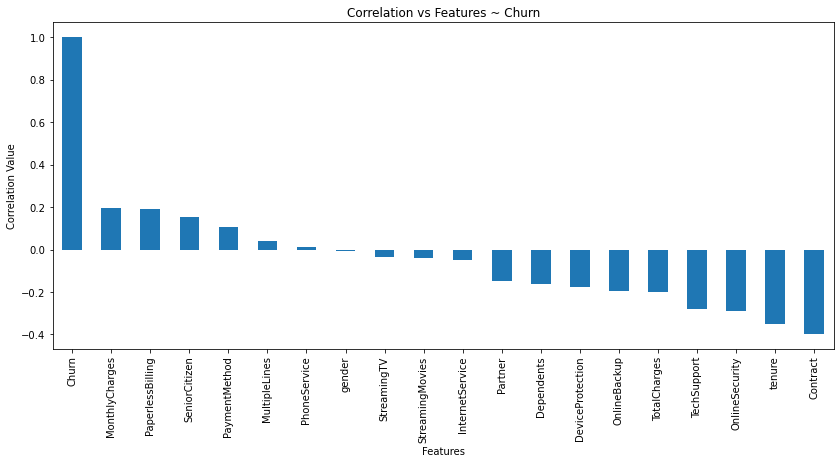

In [14]:
fig, ax = plt.subplots(figsize=(14,6)) # fig & axes objects to control visualizations

corr['Churn'].sort_values(ascending=False).plot(kind='bar') # Bar~plot
ax.set_title("Correlation vs Features ~ Churn")
ax.set_xlabel("Features")
ax.set_ylabel("Correlation Value")

    Note:
    
    * Correlation coefficient ranges between 1.0 and -1.0. 
        - (1.0 shows a perfect positive correlation)
        - (0.0 means no linear relation exists)
        - (-1.0 shows a perfect negative correlation)
        
    * Based on the strength of the correlation, we will pick features with an absolute
      correlation value greater than 1.0.
    
      Hence, these features would be all except "MultipleLines, PhoneService, gender, StreamningTV,
      StreamingMovies, and InternetService".

In [15]:
# Features
features = list()

for feature_name, corr_coeff_ in zip(corr['Churn'].index, corr['Churn'].values):
    
    if feature_name == "Churn":
        pass
    elif abs(corr_coeff_) > 0.1:
        features.append(feature_name)
    pass

print("Selected Features:", features)

Selected Features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


#### XGBOOST MODEL

    Selected Features

In [16]:
X = data[features] # Feature
y = data.iloc[:, -1] # Label

    Hyperparameter Tuning with GridSearch & XGBOOST

In [22]:
from sklearn.model_selection import GridSearchCV

# Converting data to DMatrix format
churn_dmatrix = xgb.DMatrix(X, y)

# Create the parameter grid: gbm_param_grid
gb_param_grid = {
    'eta': [0.01, 0.1, 0.5, 1],
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the classifier: cg_cl_2
gb_model_1 = xgb.XGBClassifier(objective="binary:logistic")

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gb_model_1, param_grid=gb_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    7.9s finished


Best parameters found:  {'colsample_bytree': 0.7, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  0.4437716963614957


    XGBOOST MODEL

In [23]:
import xgboost as xgb # import xgboost model

from sklearn.model_selection import train_test_split # split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBOOST Classifier
gb_model = xgb.XGBClassifier(
    objective="binary:logistic", 
    max_depth=5, 
    n_estimators=50, 
    learning_rate=0.1, 
    colsample_bytree=0.7
)

# Classifier Fitting
gb_model.fit(X_train.values, y_train.values)

# Prediction
preds = gb_model.predict(X_test.values)

    Model Evaluation
    
        * The following are some of the metrics we will use the evaluate the accuracy of our model:
          - Confusion Matrix
          - Accuracy
          - ROC AUC value

In [24]:
# Model Accuracy

accuracy = (np.sum(preds == y_test) / y_test.shape[0]) # Correctly predicted / all outcomes
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8062455642299503


In [25]:
# AUC Score

from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, preds)
print("AUC Score: {}".format(auc_score))

AUC Score: 0.71983396648276


In [44]:
# Confidence Factor; 95% confidence interval (z=1.96), classification error, number of examples

from math import sqrt # math

error = (np.sum(preds != y_test) / y_test.shape[0])

interval = 1.96 * sqrt( (error * (1 - error)) / y_train.shape[0])
print('Interval: %.3f' % interval)
print('Error: {}'.format(error))

Interval: 0.010
Error: 0.1937544357700497


    Intepretation:
    
    - The classification error of the model is 19% +/- 1%.
    - The true classification error of the model is between 18% and 20%.

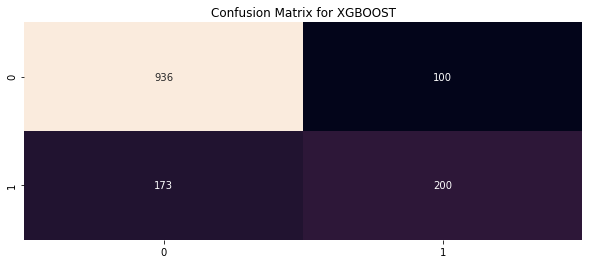

In [26]:
from sklearn.metrics import confusion_matrix # confusion matrix

cm = confusion_matrix(y_test, preds)

# DataFrame contain confusion matrix
df_cm = pd.DataFrame(data=cm)

fig, ax = plt.subplots(figsize=(10,4))

ax.set_title("Confusion Matrix for XGBOOST")
ax.set_xlabel("True Classes")
ax.set_ylabel("Predicted Classes")
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=ax)

    # Saving the Model

In [47]:
import pickle

pickle.dump(gb_model, open("model.pkl", "wb"))

In [69]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
import pickle

filename = "model.pkl"

def encode(zipped_arr):
    """
    :param zipped_arr: an array with feature name and value
    :return: a list of encoded values
    """

    encoded_values =list()

    binary_features = ["Senior Citizen", "Partner", "Dependents", "Paperless Billing"]
    ternary_features = ["Online Security", "Online Backup", "Device Protection", "Tech Support"]

    for feature, value in zipped_arr:

        if feature in binary_features:
            if value == "No":
                encoded_values.append(0)
            else:
                encoded_values.append(1)

        elif feature in ternary_features:
            if value == "No":
                encoded_values.append(0)
            elif value == "Yes":
                encoded_values.append(2)
            else:
                encoded_values.append(1)

        elif feature == "Contract":
            if value == "Month-to-Month":
                encoded_values.append(0)
            elif value == "One year":
                encoded_values.append(1)
            else:
                encoded_values.append(2)

        elif feature == "Payment Method":
            if value == "Electronic Check":
                encoded_values.append(2)
            elif value == "Mailed Check":
                encoded_values.append(3)
            elif value == "Bank Transfer":
                encoded_values.append(0)
            else:
                encoded_values.append(1)

        else:
            encoded_values.append(value)

    return encoded_values


def main():

    title \
        = """ 
        <div style="padding:10px; text-align:center">
            <h1> CUSTOMER CHURN MODEL </h1>    
        </div> """

    message \
        = """
        <div style="padding:10px; text-align:center">
            <h3>Kindly fill-in the following information to predict whether a customer will churn or not.</h3>
        </div>
        """

    encoded_values = list()
    
    st.markdown(title, unsafe_allow_html=True)
    st.markdown(message, unsafe_allow_html=True)

#     citizen = st.selectbox("Senior Citizen", options=["Yes", "No"])
#     partner = st.selectbox("Partner", options=["Yes", "No"])
#     dependents = st.selectbox("Dependents", options=["Yes", "No"])
#     security = st.selectbox("Online Security", options=["Yes", "No", "No Internet Service"])
#     backup = st.selectbox("Online Backup", options=["Yes", "No", "No Internet Service"])
#     device_protection = st.selectbox("Device Protection", options=["Yes", "No", "No Internet Service"])
#     tech_support = st.selectbox("Tech Support", options=["Yes", "No", "No Internet Service"])
#     contract = st.selectbox("Contract", options=["Month-to-Month", "One year", "Two year"])
#     paperless_billing = st.selectbox("Paperless Billing", options=["Yes", "No"])
#     payment_method = st.selectbox("Payment Method", options=["Electronic Check", "Mailed Check", "Bank Transfer", "Credit Card"])
#     tenure = st.number_input("Tenure", key=1, value=0)
#     monthly_charges = st.number_input("Monthly Charges", key=2, value=0.0)
#     total_charges = st.number_input("Total Charges", key=3, value=0.0)

    citizen = st.selectbox("Senior Citizen", options=["Yes", "No"])
    if citizen == 'Yes':
      encoded_values.append(0)
    elif Contract == 'No':
      encoded_values.append(1)  
    else:
      list.append(2)
    
    partner = st.selectbox("Partner", options=["Yes", "No"])
    if partner == 'Yes':
      encoded_values.append(0)
    elif partner == 'No':
      encoded_values.append(1)  
    else:
      list.append(2)
    
    dependents = st.selectbox("Dependents", options=["Yes", "No"])
    if dependents == 'Yes':
      encoded_values.append(0)
    elif dependents == 'No':
      encoded_values.append(1)  
    else:
      list.append(2)
    
    security = st.selectbox("Online Security", options=["Yes", "No", "No Internet Service"])
    if security == 'Yes':
      encoded_values.append(0)
    elif security == 'No':
      encoded_values.append(1)  
    else:
      encoded_values.append(2)
    
    backup = st.selectbox("Online Backup", options=["Yes", "No", "No Internet Service"])
    if backup == 'Yes':
      encoded_values.append(0)
    elif backup == 'No':
      encoded_values.append(1)  
    else:
      encoded_values.append(2)
    
    device_protection = st.selectbox("Device Protection", options=["Yes", "No", "No Internet Service"])
    if device_protection == 'Yes':
      encoded_values.append(0)
    elif device_protection == 'No':
      encoded_values.append(1)  
    else:
      encoded_values.append(2)
    
    tech_support = st.selectbox("Tech Support", options=["Yes", "No", "No Internet Service"])
    if tech_support == 'Yes':
      encoded_values.append(0)
    elif tech_support == 'No':
      encoded_values.append(1)  
    else:
      encoded_values.append(2)
    
    contract = st.selectbox("Contract", options=["Month-to-Month", "One year", "Two year"])
    if contract == 'Yes':
      encoded_values.append(0)
    elif contract == 'No':
      encoded_values.append(1)  
    else:
      encoded_values.append(2)
    
    paperless_billing = st.selectbox("Paperless Billing", options=["Yes", "No"])
    if paperless_billing == 'Yes':
      encoded_values.append(0)
    elif paperless_billing == 'No':
      encoded_values.append(1)  
    else:
      encoded_values.append(2)
    
    payment_method = st.selectbox("Payment Method", options=["Electronic Check", "Mailed Check", "Bank Transfer", "Credit Card"])
    if payment_method == 'Yes':
      encoded_values.append(0)
    elif payment_method == 'No':
      encoded_values.append(1)  
    else:
      encoded_values.append(2)
    
    tenure = st.number_input("Tenure", key=1, value=0)
    encoded_values.append(tenure)
    
    monthly_charges = st.number_input("Monthly Charges", key=2, value=0.0)
    encoded_values.append(monthly_charges)
    
    total_charges = st.number_input("Total Charges", key=3, value=0.0)
    encoded_values.append(total_charges)

    # ________________________
    btn = st.button("Predict")

    # Click button
    if btn:

        features = ["Tech Support", "Payment Method", "Partner", "Total Charges", "Monthly Charges",
                    "Dependents", "Tenure", "Device Protection", "Online Backup", "Paperless Billing",
                    "Contract", "Senior Citizen", "Online Security"]

        values = [tech_support, payment_method, partner, total_charges, monthly_charges, dependents,
                  tenure, device_protection, backup, paperless_billing, contract, citizen, security]

        encoded_values = encode(zip(features, values))
        
        encoded_values = np.array(encoded_values).reshape((1,-1))
        
        xgb_model=pickle.load(open(filename,'rb'))

        y_user_prediction= xgb_model.predict(my_array)
    
        if y_user_prediction == 0:
            st.subheader("Customer will not churn")
        else:
            st.subheader("Customer will churn")
        

if __name__ == '__main__':
    main()


Overwriting app.py


In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.79:8501

